                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148045.000000  148650.000000  148650.000000   
mean    74327.500000   66325.448840    5066.059886    3648.767297   
std     42912.857795   42764.635495   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37164.250000   33588.200000       0.000000       0.000000   
50%     74327.500000   65007.450000       0.000000     811.270000   
75%    111490.750000   94691.050000    4658.175000    4236.065000   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  112491.000000  148654.000000     148654.000000  148654.000000    0.0   
mean    25007.893151   74768.321972      93692.554811    2012.522643    NaN   
std     15402.215858   50517.005274      62793.533483       1.117538    NaN   
min       -33.890000    -618.130000       -618.130000    2011.

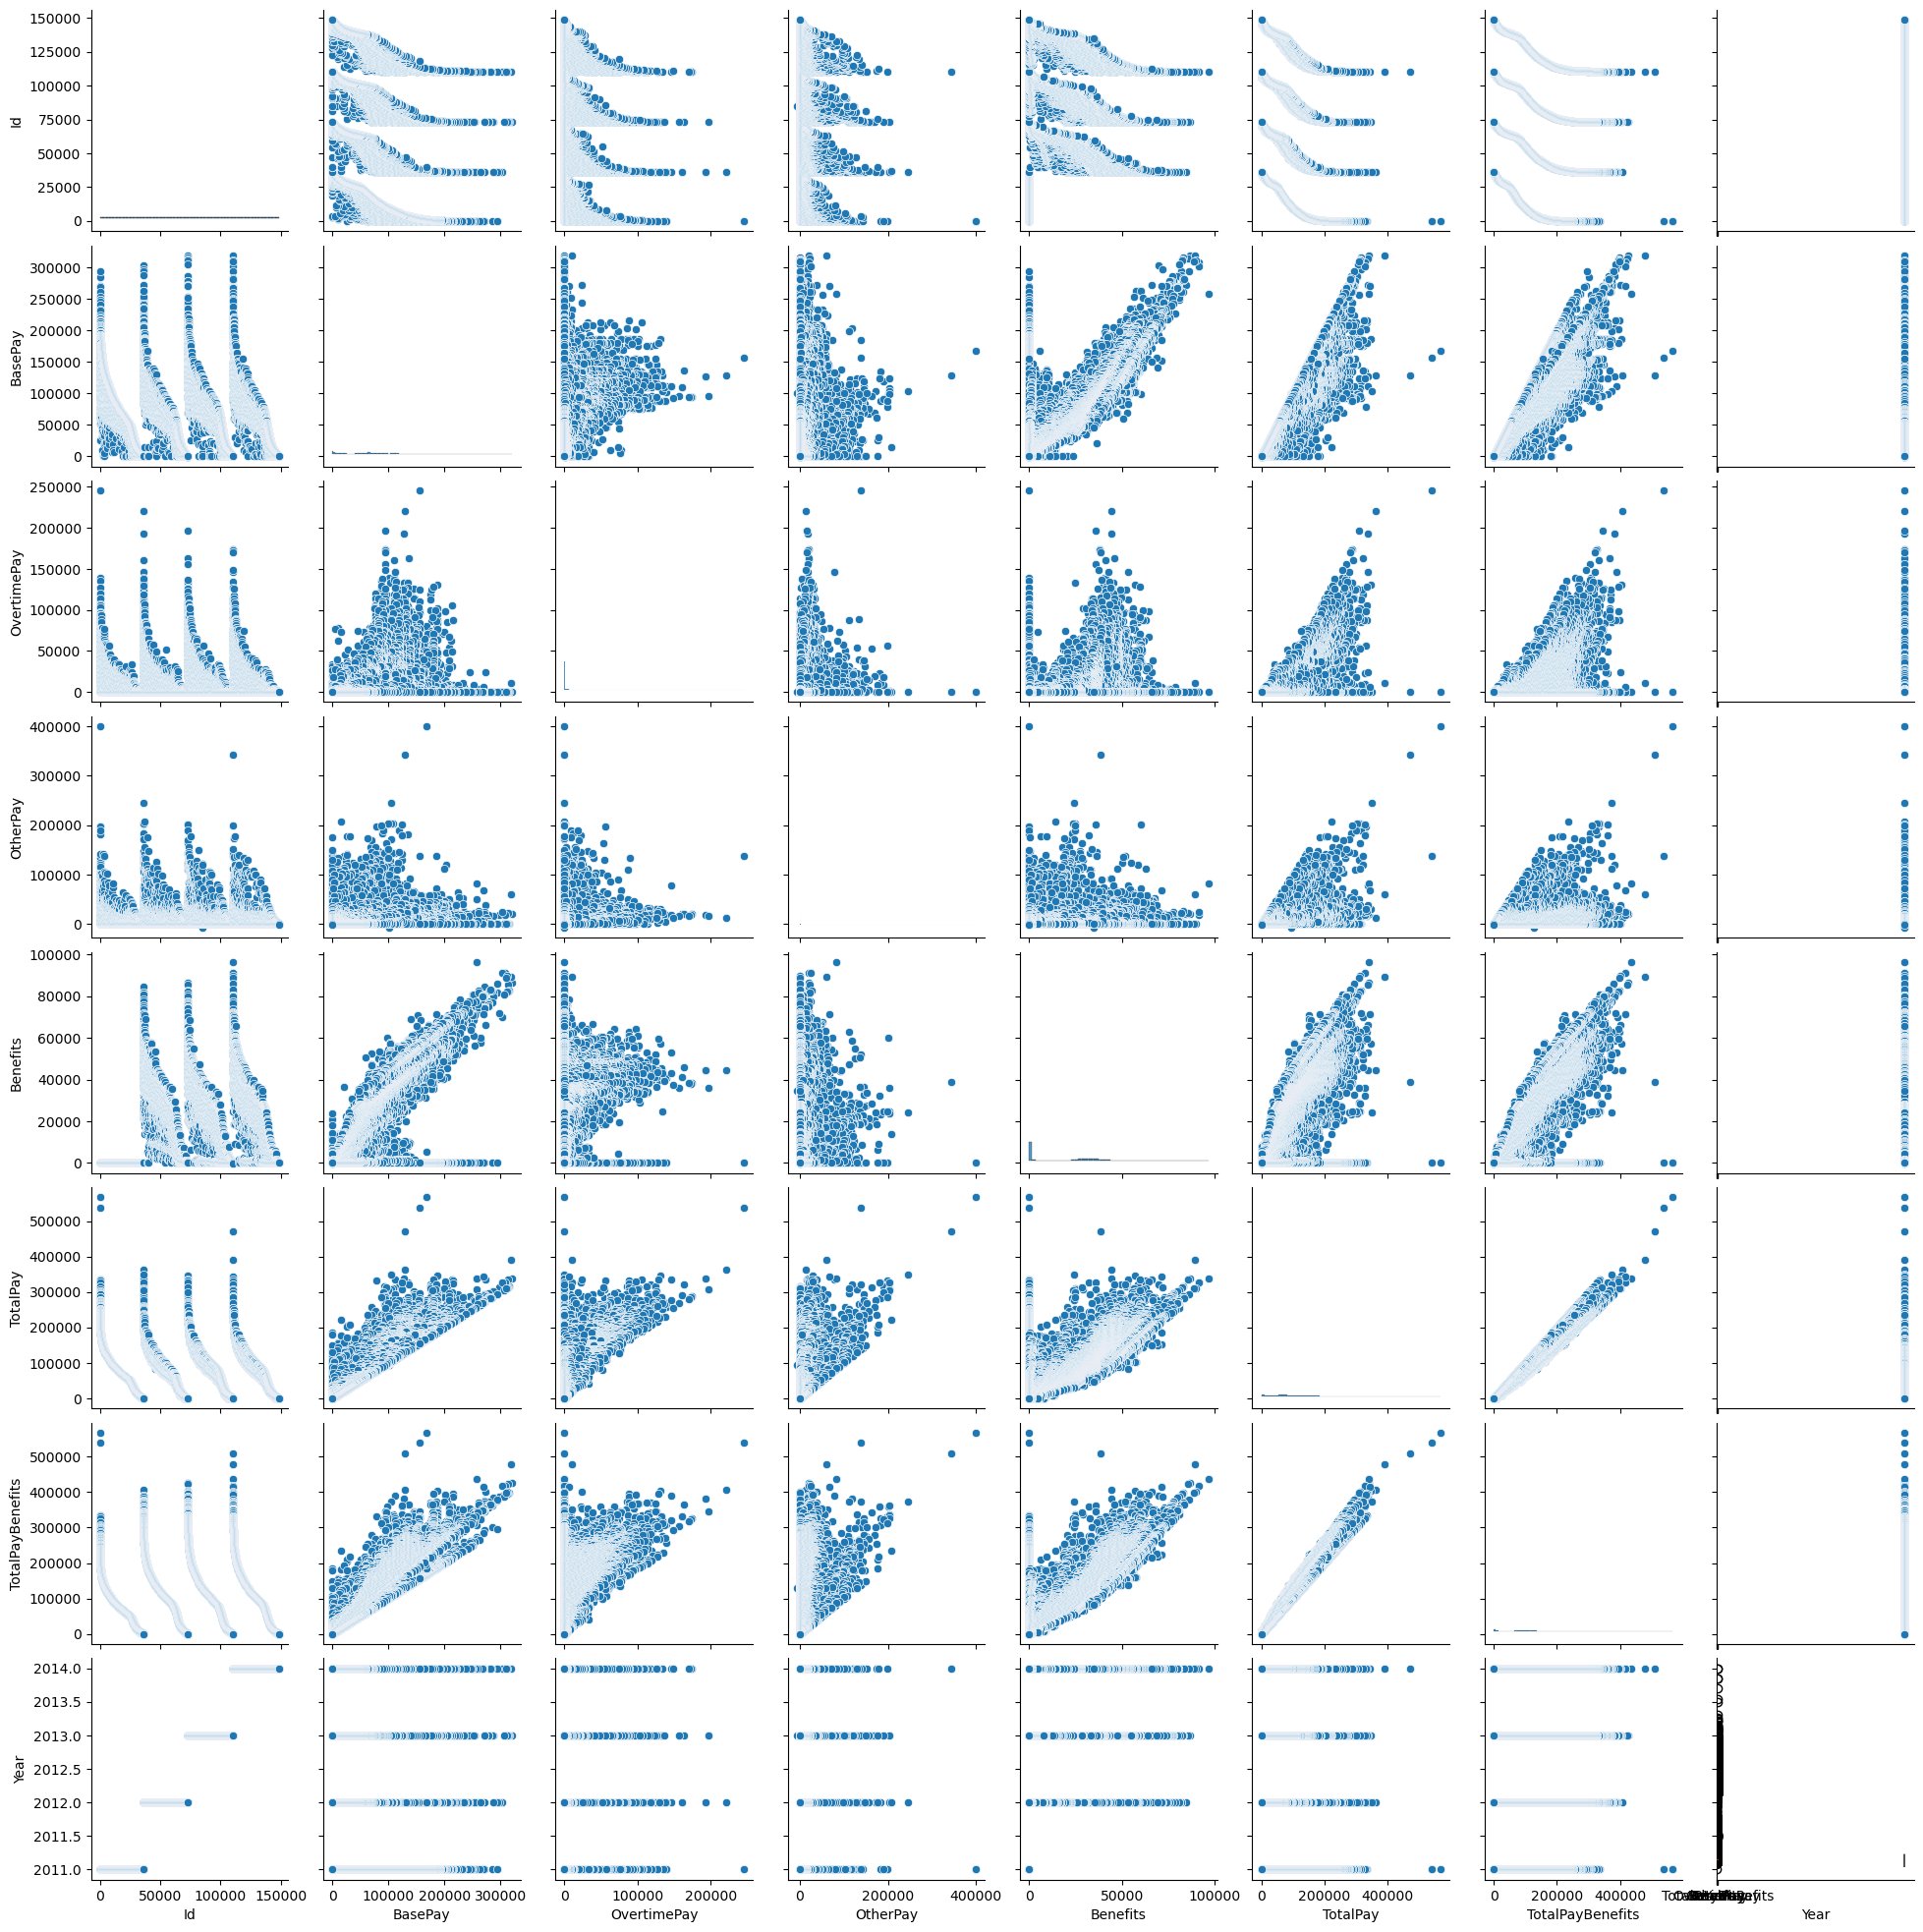

            Id  EmployeeName  JobTitle   BasePay  OvertimePay   OtherPay  \
0            1     -1.365326  2.183904  2.363385    -0.442276  49.219406   
1            2     -1.365326  1.758113  2.096514    20.958738  16.652753   
2            3     -1.365326  1.831219  3.420311     8.819655   1.589269   
3            4     -1.365326  0.392208  0.276596     4.457291  24.161671   
4            5     -1.365326  2.582443  1.593689     0.407804  22.166719   
...        ...           ...       ...       ...          ...        ...   
148649  148650     -1.365326 -0.403629 -1.540196    -0.442276  -0.452886   
148650  148651     -1.492078 -1.492078 -1.540196    -0.442276  -0.452886   
148651  148652     -1.492078 -1.492078 -1.540196    -0.442276  -0.452886   
148652  148653     -1.492078 -1.492078 -1.540196    -0.442276  -0.452886   
148653  148654     -1.365326 -0.221633 -1.540196    -0.442276  -0.529610   

        Benefits  TotalPay  TotalPayBenefits  Year  
0      -1.102475  9.755700        

In [11]:
import seaborn as sns
import numpy as np
import pandas as pd
import statistics as st 
import matplotlib.pyplot as plt
import sklearn.model_selection as sk 
A=pd.read_csv(r"C:\Users\Sara\Downloads\Salaries.csv")
#understand data
print(A.describe())
print(A.info())
#Remove columns with null data 
A.drop(columns="Status",inplace=True)
A.drop(columns="Notes",inplace=True)
A.drop(columns="Agency",inplace=True)
print(A.columns)
#replace all nulls with 0s
o=['BasePay','OvertimePay','OtherPay', 'Benefits']
for h in o:
    A.update(A[h].fillna(st.mode(A[h])))
#View data
sns.pairplot(A)
#See outliers: There are a lot
M=A.drop(columns=['Id','EmployeeName','JobTitle'])
print(M.columns)
plt.boxplot(M,labels=M.columns)
plt.show()
#Use Standarize
def stan(name):
    R=list(A[name])
    s=0
    counter=0
    for i in R:
       s=s+i
       counter=counter+1
    M=s/counter
    v=0
    for j in R:
        v=v+((j-M)**2)
    t=(v/counter)**0.5
    A[name]=(A[name]-M)/t
lis=list(M.columns)
for i in lis:
    if i!="Year":
        stan(i)
#Encode categorical Data
def k_fold_category_stats(data, target_col, category_col, k=5):
    kf = sk.KFold(n_splits=k, shuffle=True)
    
    # Copy the dataframe to avoid changing the original data
    data_copy = data.copy()
    
    # Create a column to store the stats
    stat_col_name = f'{category_col}_target_mean'
    data_copy[stat_col_name] = 0.0
    
    for train_index, val_index in kf.split(data):
        train_data = data.iloc[train_index]
        val_data = data.iloc[val_index]
        
        # Calculate mean target value for each category in the training data
        category_means = train_data.groupby(category_col)[target_col].mean()
        
        # Apply the mean values to the validation data
        data_copy.loc[val_index, stat_col_name] = val_data[category_col].map(category_means)
    data_copy.update(data_copy[stat_col_name].fillna(st.mode(data_copy[stat_col_name])))
    return data_copy,stat_col_name
k = 20
z=['EmployeeName', 'JobTitle']
for name in z:
    x,y= k_fold_category_stats(A, target_col='TotalPayBenefits', category_col=name, k=k)
    A[name]=x[y]
print(A)
print(A.corr()['TotalPayBenefits'])